<a href="https://colab.research.google.com/github/fadi-theodory/Machine-learning/blob/main/(Core)_Resampling_Datetime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#(Core) Resampling Datetime Data


In [70]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns


In [71]:
fpath="/content/drive/MyDrive/AXSOSACADEMY/04-Time Series/Week13/Data/london_weather.csv"
df=pd.read_csv(fpath)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Part 1 - Load the data and make a datetime index.




In [72]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [73]:
df.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [74]:
df = df.set_index('datetime')
df


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


> Filter out only the required data:
Keep only data from the year 2000 or later.
  Keep only the following features:
precipitation
mean_temp
min_temp
max_temp
snow_depth

In [75]:
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
1979-01-01,0.4,-4.1,-7.5,2.3,9.0
1979-01-02,0.0,-2.6,-7.5,1.6,8.0
1979-01-03,0.0,-2.8,-7.2,1.3,4.0
1979-01-04,0.0,-2.6,-6.5,-0.3,2.0
1979-01-05,0.0,-0.8,-1.4,5.6,1.0


In [76]:
# to drop years before 2000
df = df[df.index.year >= 2000]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


> imputation

In [77]:
df.isna().sum()

,0
precipitation,6
mean_temp,36
min_temp,2
max_temp,6
snow_depth,1441


In [78]:
# we will impute percipitation,mean_temp  with interpolate, min_temp with forwardfill, max_temp backfill
# and snowdepth with interpliation
df['precipitation'] = df['precipitation'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].ffill()
df['max_temp'] = df['max_temp'].bfill()
df['snow_depth'] = df['snow_depth'].interpolate()
df.isna().sum()

,0
precipitation,0
mean_temp,0
min_temp,0
max_temp,0
snow_depth,0


## Part 2 Answer the Questions with Visualizations (Using the Correct Frequency)

In [79]:
# to make a copy of the dataframe after filtering
ts = df['precipitation'].copy()
ts.head()

,precipitation
datetime,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8


In [80]:
# to keep ts only between 2000 and 2010
ts = ts['2000':'2010']
ts

,precipitation
datetime,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


### Q1: What month had the most precipitation between 2000 through 2010?

In [81]:
#Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
ts= ts.resample('ME').sum()
ts

,precipitation
datetime,
2000-01-31,16.5
2000-02-29,62.2
2000-03-31,16.0
2000-04-30,99.6
2000-05-31,87.2
...,...
2010-08-31,88.6
2010-09-30,38.2
2010-10-31,74.8


In [82]:
#Find the date and corresponding value for the max precipitation.
max_precipitation = ts.max()
max_precipitation_date = ts.idxmax()
max_precipitation

155.4

In [83]:
max_precipitation_date

Timestamp('2000-10-31 00:00:00')

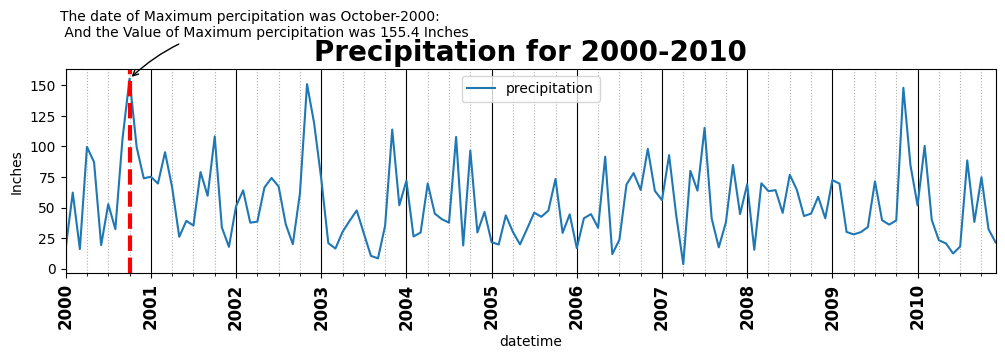

In [84]:
fig, ax = plt.subplots(figsize=(12,3))
ts.plot(ax=ax)
# to set title
ax.set_title("Precipitation for 2000-2010");
# to make title bold and bigger size
ax.title.set_fontsize(20)
ax.title.set_fontweight('bold')
# to set y axis as count of Sentiment
ax.set_ylabel("Inches");

 ## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
# Change the font of the major ticks to stand out
xtick_fontsize='large'
xtick_fontweight='bold'
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),
                       fontsize=xtick_fontsize,
                       fontweight=xtick_fontweight)
# to show months
loc_1months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")
# to show the name of each month

      ## customize major ticks
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(which='major',rotation=90,ha='center')
ax.tick_params(axis="x", which="minor", labelsize=8, labelrotation=45)

ax.legend()

ax.axvline(x=max_precipitation_date, color='red', linestyle='--', linewidth=3)
# to show the date under that line
ax.annotate(f"The date of Maximum percipitation was {max_precipitation_date.strftime('%B-%Y')}:\n And the Value of Maximum percipitation was {max_precipitation} Inches",
            xy=(max_precipitation_date, max_precipitation),
            xycoords='data',
            xytext=(-50, 30),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"));

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [85]:
# to make a copy of the dataframe after filtering
tss = df["mean_temp"].copy()
tss.head()


,mean_temp
datetime,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4


In [86]:
tss = tss['2000':'2020']
tss


,mean_temp
datetime,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [87]:
#Resample  to ayearly  frequency using .mean () as the aggregation method
tss= tss.resample('Y').mean()
tss


/tmp/ipython-input-1762862872.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tss= tss.resample('Y').mean()


,mean_temp
datetime,
2000-12-31,11.582514
2001-12-31,11.339452
2002-12-31,12.084384
2003-12-31,12.138356
2004-12-31,11.868579
2005-12-31,11.825479
2006-12-31,12.299589
2007-12-31,11.926575
2008-12-31,11.347268


In [88]:
# the lowest mean temp rounded to 2
lowest = round(tss.min(),2)
lowest

10.64

In [89]:
# date of lowest mean team
lowest_date = tss.idxmin()
lowest_date

Timestamp('2010-12-31 00:00:00')

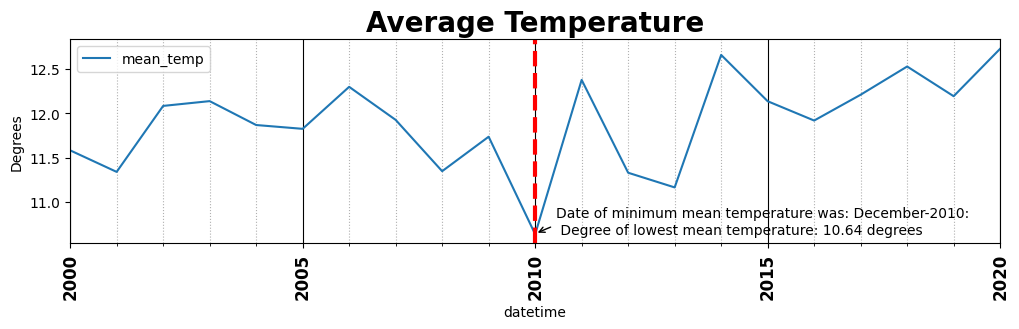

In [103]:
fig, ax = plt.subplots(figsize=(12,3))
tss.plot(ax=ax)
# to set title
ax.set_title("Average Temperature");
# to make title bold and bigger size
ax.title.set_fontsize(20)
ax.title.set_fontweight('bold')
# to set y axis as count of Sentiment
ax.set_ylabel("Degrees");

 ## for major year ticks
loc_year = mdates.YearLocator(base=5)
fmt_year = mdates.DateFormatter("%Y")
# Change the font of the major ticks to stand out
xtick_fontssize='large'
xtick_fontweight='bold'
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),
                       fontsize=xtick_fontssize,
                       fontweight=xtick_fontweight)
# to show months
loc_1year = mdates.YearLocator(base=1)
fmt_months = mdates.DateFormatter("%Y")
# to show the name of each month

      ## customize major ticks
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(which='major',rotation=90,ha='center')
ax.tick_params(axis="x", which="minor", labelsize=8, labelrotation=45)

ax.legend()

ax.axvline(x=lowest_date, color='red', linestyle='--', linewidth=3)
# to show the date under that line
ax.annotate(f"Date of minimum mean temperature was: {lowest_date.strftime('%B-%Y')}:\n Degree of lowest mean temperature: {lowest} degrees",
            xy=(lowest_date, lowest),
            xycoords='data',
            xytext=(15, 0),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"));
